In [48]:
# What do you want to do
# Get the index of citibike files, pull them, extract them
# Helpful link https://medium.com/@fausto.manon/building-a-citibike-database-with-python-9849a59fb90c
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import zipfile
import logging
import matplotlib

In [ ]:
pd.read_csv('extracted_data/202207-citbike-tripdata.csv')

In [7]:
url = 'https://s3.amazonaws.com/tripdata/'

In [8]:
resp = requests.get(url)

In [9]:
parsed_xml = BeautifulSoup(resp.text, 'xml')

In [10]:
keys = [content.Key.text for content in parsed_xml.ListBucketResult.find_all('Contents')]

In [11]:
for key in keys:
    with open('data/%s' % key, 'wb') as outfile:
        resp = requests.get(url + key)
        outfile.write(resp.content)


In [9]:
for key in keys:
    if key.endswith('.zip'):
        path = 'data/%s' % key
        if not zipfile.is_zipfile(path):
            logging.error('%s is not a valid zipfile' % path)
        with zipfile.ZipFile(path, 'r') as ref:
            files = list(filter(lambda x: x.endswith('.csv') and not x.startswith('__'), ref.namelist()))
            if len(files) == 1:
                file = files[0]
                ref.extract(file, path='extracted_data/')
            else:
                logging.error('Multiple eligible files found in %s. Not extracting' % key)

ERROR:root:Multiple eligible files found in 201307-201402-citibike-tripdata.zip. Not extracting


In [13]:
test_file = pd.read_csv('extracted_data/202207-citbike-tripdata.csv')

/tmp/ipykernel_32597/4000290333.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  test_file = pd.read_csv('extracted_data/202207-citbike-tripdata.csv')


In [25]:
test_file['rideable_type'].value_counts()

classic_bike     2631191
electric_bike     828110
docked_bike        38089
Name: rideable_type, dtype: int64

In [28]:
test_file['member_casual'].value_counts()

member    2659420
casual     837970
Name: member_casual, dtype: int64

In [27]:
test_file['start_station_name'].value_counts()

West St & Chambers St       15901
W 21 St & 6 Ave             13516
Broadway & W 58 St          12795
Broadway & E 14 St          12681
6 Ave & W 33 St             12632
                            ...  
Morgan WH station              17
Morgan Loading Docks           15
Nassau St\t& Duffield St       14
54 St & 37 Ave                 10
Lab - NYC                       2
Name: start_station_name, Length: 1583, dtype: int64

In [40]:
test_file[test_file['rideable_type'] == 'electric_bike'].value_counts('end_station_name').filter(regex= '.*Franklin.*')


end_station_name
Milton St & Franklin St         1590
Franklin St & Dupont St         1189
Eastern Pkwy & Franklin Ave     1151
Huron St & Franklin St           954
Dean St & Franklin Ave           798
DeKalb Ave & Franklin Ave        762
Franklin Ave & St Marks Ave      688
Park Pl & Franklin Ave           511
Franklin St & W Broadway         471
Lefferts Pl & Franklin Ave       445
Franklin Ave & Myrtle Ave        381
Sullivan Pl & Franklin Ave       322
Carroll St & Franklin Ave        281
Franklin Ave & E 169 St          241
3 Ave & Franklin Ave             200
Montgomery St & Franklin Ave     148
E 167 St & Franklin Ave          115
dtype: int64

In [42]:
ebikes = test_file[test_file['rideable_type'] == 'electric_bike']

<AxesSubplot:ylabel='Frequency'>

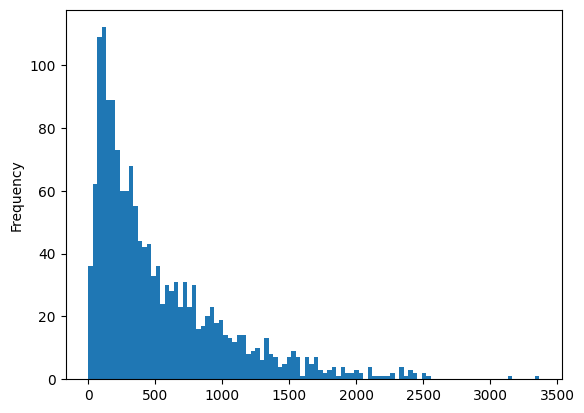

In [53]:
ebikes['start_station_name'].value_counts().plot.hist(bins=100)

In [66]:
ebikes['start_station_name'].value_counts().reset_index()

,index,start_station_name
0,Broadway & W 58 St,3363
1,1 Ave & E 68 St,3147
2,6 Ave & W 33 St,2530
3,7 Ave & Central Park South,2521
4,11 Ave & W 41 St,2493
...,...,...
1570,55 St & Northern Blvd,5
1571,9 Ave & W 204 St,5
1572,Morgan Loading Docks,2
1573,54 St & 37 Ave,1
